In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

This is an SIR compartmentalized model with births and deaths. The Following cell contains all parameters for the model.

In [2]:
# Total Population
N = 1300

# Initial Infected
I_0 = 1

# Initial Recovered
R_0 = 0

# Initial dead
D_0 = 0

# Everyone else (susceptible)
S_0 = N - I_0 - R_0 - D_0

# Contact Rate (beta), recovery rate (gamma, in 1 / day), and death rate (mu)
beta = 0.24
gamma = 1. / 20
mu = 1. / 2600

# Vaccination rate per day (delta)
delta = 0

# Duration (days)
d = 250

In [3]:
# Differential Equation

def deriv(y, t):
    S, I, R, D = y
    dS_dt = (-beta * S * I / N) - delta
    dI_dt = (beta * S * I / N - gamma * I) - (mu * I)
    dR_dt = gamma * I
    dD_dt = (mu * I)
    
    return dS_dt, dI_dt, dR_dt, dD_dt

In [4]:
# Initial Conditions vector
y_0 = S_0, I_0, R_0, D_0

t = np.linspace(0, d, d)

# Integrate the SIR equations voer the time grid, t
ret = odeint(deriv, y_0, t)
S, I, R, D = ret.T

Population: 1290


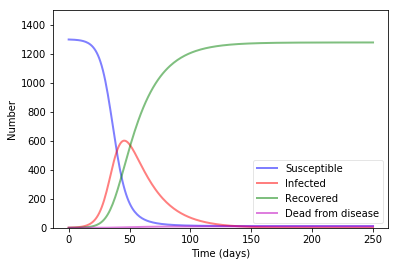

In [5]:
# Plot the equation

fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, D, 'm', alpha=0.5, lw=2, label='Dead from disease')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Number')
ax.set_ylim(0, N + 200)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

plt.show()
print("Population:", int((S + I + R)[-1]))